# Social Network Analysis applied to Data Warehouses

## 5. Presentation examples based on a sample dataset

### 5.1. Import dependencies

In [1]:
import itertools
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import networkx as nx
from networkx.classes.graph import Graph
import numpy as np

### 5.2. Utility functions

In [2]:
def load_graph_from_csv(file: str) -> Graph:
    return nx.read_edgelist(file, delimiter=",", create_using=nx.DiGraph)

In [3]:
def format_graph_info(graph_id: str, graph: Graph) -> str:
    return (
        f"{graph_id.upper()} GRAPH INFO:\n"
        f"  Number of nodes: {nx.number_of_nodes(graph)}\n"
        f"  Number of edges: {nx.number_of_edges(graph)}\n"
        f"  Density: {nx.density(graph)}\n"
        f"  Average clustering coefficient: {nx.average_clustering(graph)}\n"
        f"  Transitivity: {nx.transitivity(graph)}"
    )

In [4]:
def draw_out_degree_based_network(graph: Graph) -> None:
    highest_degree = max([degree for _, degree in graph.out_degree])
    scaling_factor = 3500 / highest_degree

    normalized_node_params = [
        (degree or 0.05) * scaling_factor for _, degree in graph.out_degree
    ]

    plt.figure(figsize=(8, 5))
    nx.draw_networkx(
        graph,
        pos=nx.spring_layout(graph),
        edge_color="dimgray",
        node_color=normalized_node_params,
        node_size=normalized_node_params,
    )
    plt.axis("off")

In [5]:
def group_nodes_by_out_degree(
    graph: Graph, highest_first: bool = True
) -> Dict[int, List[str]]:
    degrees = [degree for _, degree in graph.out_degree]
    unique_degrees = sorted(np.unique(degrees), reverse=highest_first)
    degrees_dict = {}
    for unique_degree in unique_degrees:
        degrees_dict[int(unique_degree)] = sorted(
            [node for node, degree in graph.out_degree if degree == unique_degree]
        )
    return degrees_dict

In [6]:
def get_out_degree_critical_nodes_for_count(
    graph: Graph, target_node_count
) -> Tuple[Dict[int, List[str]], float]:
    node_count = 0
    degree_groups = group_nodes_by_out_degree(graph)
    degree_sum = sum([degree for _, degree in graph.out_degree])

    group_count = 0
    while node_count < target_node_count:
        group_count += 1
        highest_degrees = dict(itertools.islice(degree_groups.items(), group_count))
        node_count = sum([len(nodes) for _, nodes in highest_degrees.items()])

    highest_degree_sum = sum(
        [degree * len(nodes) for degree, nodes in highest_degrees.items()]
    )
    groups_degree_ratio = highest_degree_sum / degree_sum * 100
    print(
        f"{group_count}-critical-groups node count: {node_count}\n"
        f"{group_count}-critical-groups/total out-degree ratio:"
        f" {groups_degree_ratio:.0f}% ({highest_degree_sum}/{degree_sum})"
    )

    return highest_degrees, node_count

In [7]:
def draw_betweenness_centrality_based_network(graph: Graph) -> None:
    bet_cent = nx.betweenness_centrality(graph, normalized=False)

    lowest_non_zero_bet_cent = min(
        [betweenness for _, betweenness in bet_cent.items() if betweenness > 0]
    )
    highest_bet_cent = max([betweenness for _, betweenness in bet_cent.items()])
    scaling_factor = 3500 / highest_bet_cent

    normalized_node_params = [
        (betweenness or (lowest_non_zero_bet_cent / 5)) * scaling_factor
        for _, betweenness in bet_cent.items()
    ]

    plt.figure(figsize=(8, 5))
    nx.draw_networkx(
        graph,
        pos=nx.spring_layout(graph),
        edge_color="dimgray",
        node_color=normalized_node_params,
        node_size=normalized_node_params,
    )
    plt.axis("off")

In [8]:
def get_betweenness_centrality_list(bet_cent: Dict[str, float]) -> List[float]:
    return [betweenness for _, betweenness in bet_cent.items()]

In [9]:
def group_nodes_by_betweenness_centrality(
    bet_cent: Dict[str, float], highest_first: bool = True
) -> Dict[float, List[str]]:
    bet_cent_list = get_betweenness_centrality_list(bet_cent)
    unique_bet_cent = sorted(np.unique(bet_cent_list), reverse=highest_first)
    sorted_bet_cent_dict = {}
    for value in unique_bet_cent:
        sorted_bet_cent_dict[value] = sorted(
            [node for node, bc in bet_cent.items() if bc == value]
        )
    return sorted_bet_cent_dict

In [10]:
def get_betweenness_centrality_critical_nodes_for_count(
    graph: Graph, target_node_count
) -> Tuple[Dict[int, List[str]], float]:
    node_count = 0
    bet_cent = nx.betweenness_centrality(graph, normalized=False)
    bc_groups = group_nodes_by_betweenness_centrality(bet_cent)

    group_count = 0
    while node_count < target_node_count:
        group_count += 1
        highest_bc = dict(itertools.islice(bc_groups.items(), group_count))
        node_count = sum([len(nodes) for _, nodes in highest_bc.items()])

    print(f"{group_count}-critical-groups node count: {node_count}\n")

    return highest_bc, node_count

In [11]:
def draw_clustering_based_network(graph: Graph) -> None:
    clustering = nx.clustering(graph)

    lowest_non_zero_clust_coef = min(
        clust_coef for _, clust_coef in clustering.items() if clust_coef > 0
    )
    highest_clust_coef = max(clust_coef for _, clust_coef in clustering.items())
    scaling_factor = 3500 / highest_clust_coef

    normalized_node_params = [
        (0.5 - (clust_coef or (lowest_non_zero_clust_coef / 10))) * scaling_factor
        for _, clust_coef in clustering.items()
    ]

    plt.figure(figsize=(8, 5))
    nx.draw_networkx(
        graph,
        pos=nx.spring_layout(graph),
        edge_color="dimgray",
        node_color=normalized_node_params,
        node_size=normalized_node_params,
    )
    plt.axis("off")

In [12]:
def get_clustering_list(clustering: Dict[str, float]) -> List[float]:
    return [clust_coef for _, clust_coef in clustering.items()]

In [13]:
def group_nodes_by_clustering(clustering: Dict[str, float]) -> Dict[float, List[str]]:
    clustering_list = get_clustering_list(clustering)
    unique_clustering = sorted(np.unique(clustering_list))
    sorted_clustering_dict = {}
    for value in unique_clustering:
        sorted_clustering_dict[value] = sorted(
            [node for node, cl in clustering.items() if cl == value]
        )
    return sorted_clustering_dict

In [14]:
def get_clustering_critical_nodes_for_count(
    graph: Graph, target_node_count
) -> Tuple[Dict[int, List[str]], float]:
    node_count = 0
    clustering = nx.clustering(graph)
    cl_groups = group_nodes_by_clustering(clustering)

    group_count = 0
    while node_count < target_node_count:
        group_count += 1
        lowest_cl = dict(itertools.islice(cl_groups.items(), group_count))
        node_count = sum([len(nodes) for _, nodes in lowest_cl.items()])

    print(f"{group_count}-critical-groups node count: {node_count}\n")

    return lowest_cl, node_count

### 5.3. Load the sample dataset from CSV

In [15]:
sample_data_folder = "../data/samples"

presentation_graph = load_graph_from_csv(
    f"{sample_data_folder}/presentation-example.csv"
)
print(f'{format_graph_info("presentation", presentation_graph)}\n')

PRESENTATION GRAPH INFO:
  Number of nodes: 11
  Number of edges: 13
  Density: 0.11818181818181818
  Average clustering coefficient: 0.1712121212121212
  Transitivity: 0.1111111111111111



### 5.4. Draw the networks

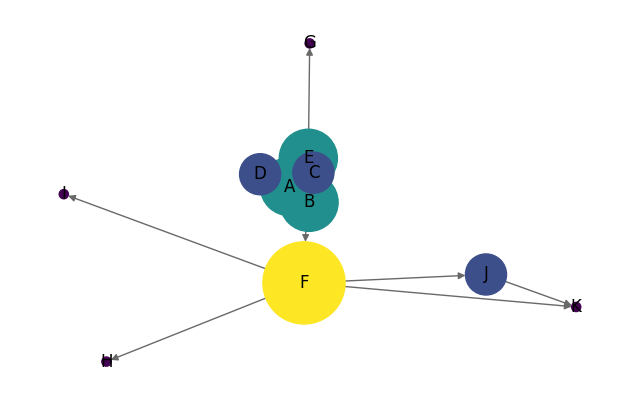

In [16]:
draw_out_degree_based_network(presentation_graph)

In [17]:
presentation_critical_groups, _ = get_out_degree_critical_nodes_for_count(
    presentation_graph, 10
)
print(f"\n{presentation_critical_groups}")

4-critical-groups node count: 11
4-critical-groups/total out-degree ratio: 100% (13/13)

{4: ['F'], 2: ['A', 'B', 'E'], 1: ['C', 'D', 'J'], 0: ['G', 'H', 'I', 'K']}


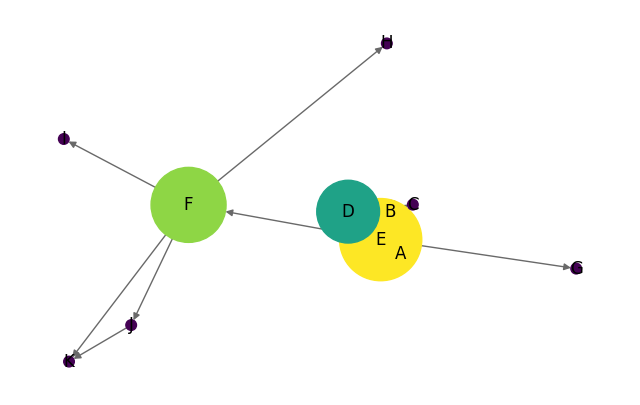

In [18]:
draw_betweenness_centrality_based_network(presentation_graph)

In [19]:
presentation_critical_groups, _ = get_betweenness_centrality_critical_nodes_for_count(
    presentation_graph, 10
)
print(f"\n{presentation_critical_groups}")

5-critical-groups node count: 11


{24.0: ['E'], 20.0: ['F'], 14.0: ['D'], 2.0: ['B'], 0.0: ['A', 'C', 'G', 'H', 'I', 'J', 'K']}


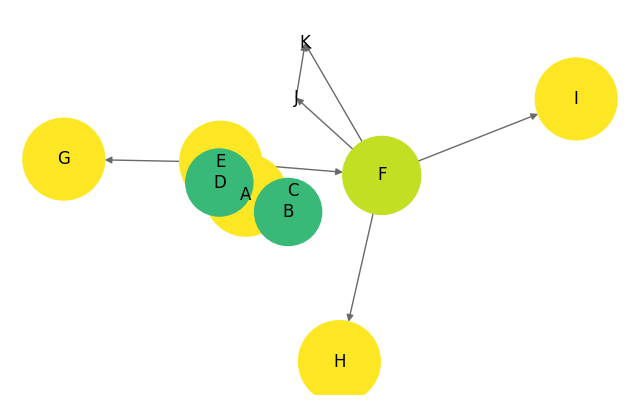

In [20]:
draw_clustering_based_network(presentation_graph)

In [21]:
presentation_critical_groups, _ = get_clustering_critical_nodes_for_count(
    presentation_graph, 10
)
print(f"\n{presentation_critical_groups}")

4-critical-groups node count: 11


{0.0: ['A', 'E', 'G', 'H', 'I'], 0.05: ['F'], 0.16666666666666666: ['B', 'D'], 0.5: ['C', 'J', 'K']}
